# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [2]:
library(tidyverse)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
measles <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv')
glimpse(measles)

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 66,113
Columns: 16
$ index    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 15, 15, 16…
$ state    <chr> "Arizona", "Arizona", "Arizona", "Arizona", "Arizona", "Arizo…
$ year     <chr> "2018-19", "2018-19", "2018-19", "2018-19", "2018-19", "2018-…
$ name     <chr> "A J Mitchell Elementary", "Academy Del Sol", "Academy Del So…
$ type     <chr> "Public", "Charter", "Charter", "Charter", "Charter", "Public…
$ city     <chr> "Nogales", "Tucson", "Tucson", "Phoenix", "Phoenix", "Phoenix…
$ county   <chr> "Santa Cruz", "Pima", "Pima", "Maricopa", "Maricopa", "Marico…
$ district <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ enroll   <dbl> 51, 22, 85, 60, 43, 36, 24, 22, 26, 78, 78, 35, 54, 54, 34, 5…
$ mmr      <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1…
$ overall  <dbl> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -…
$ xrel     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ xmed     <dbl

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here

df_vacc_rates <- measles |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(frac_above_95 = sum(mmr > 95, na.rm = TRUE)/n()) |>
    arrange(frac_above_95) |>
    head()

df_vacc_rates

state,frac_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.317997978
North Dakota,0.455555556
Maine,0.459383754
Minnesota,0.467671061
Ohio,0.483727304


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
# ARKANSAS HAS THE SMALLEST FRACTION

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

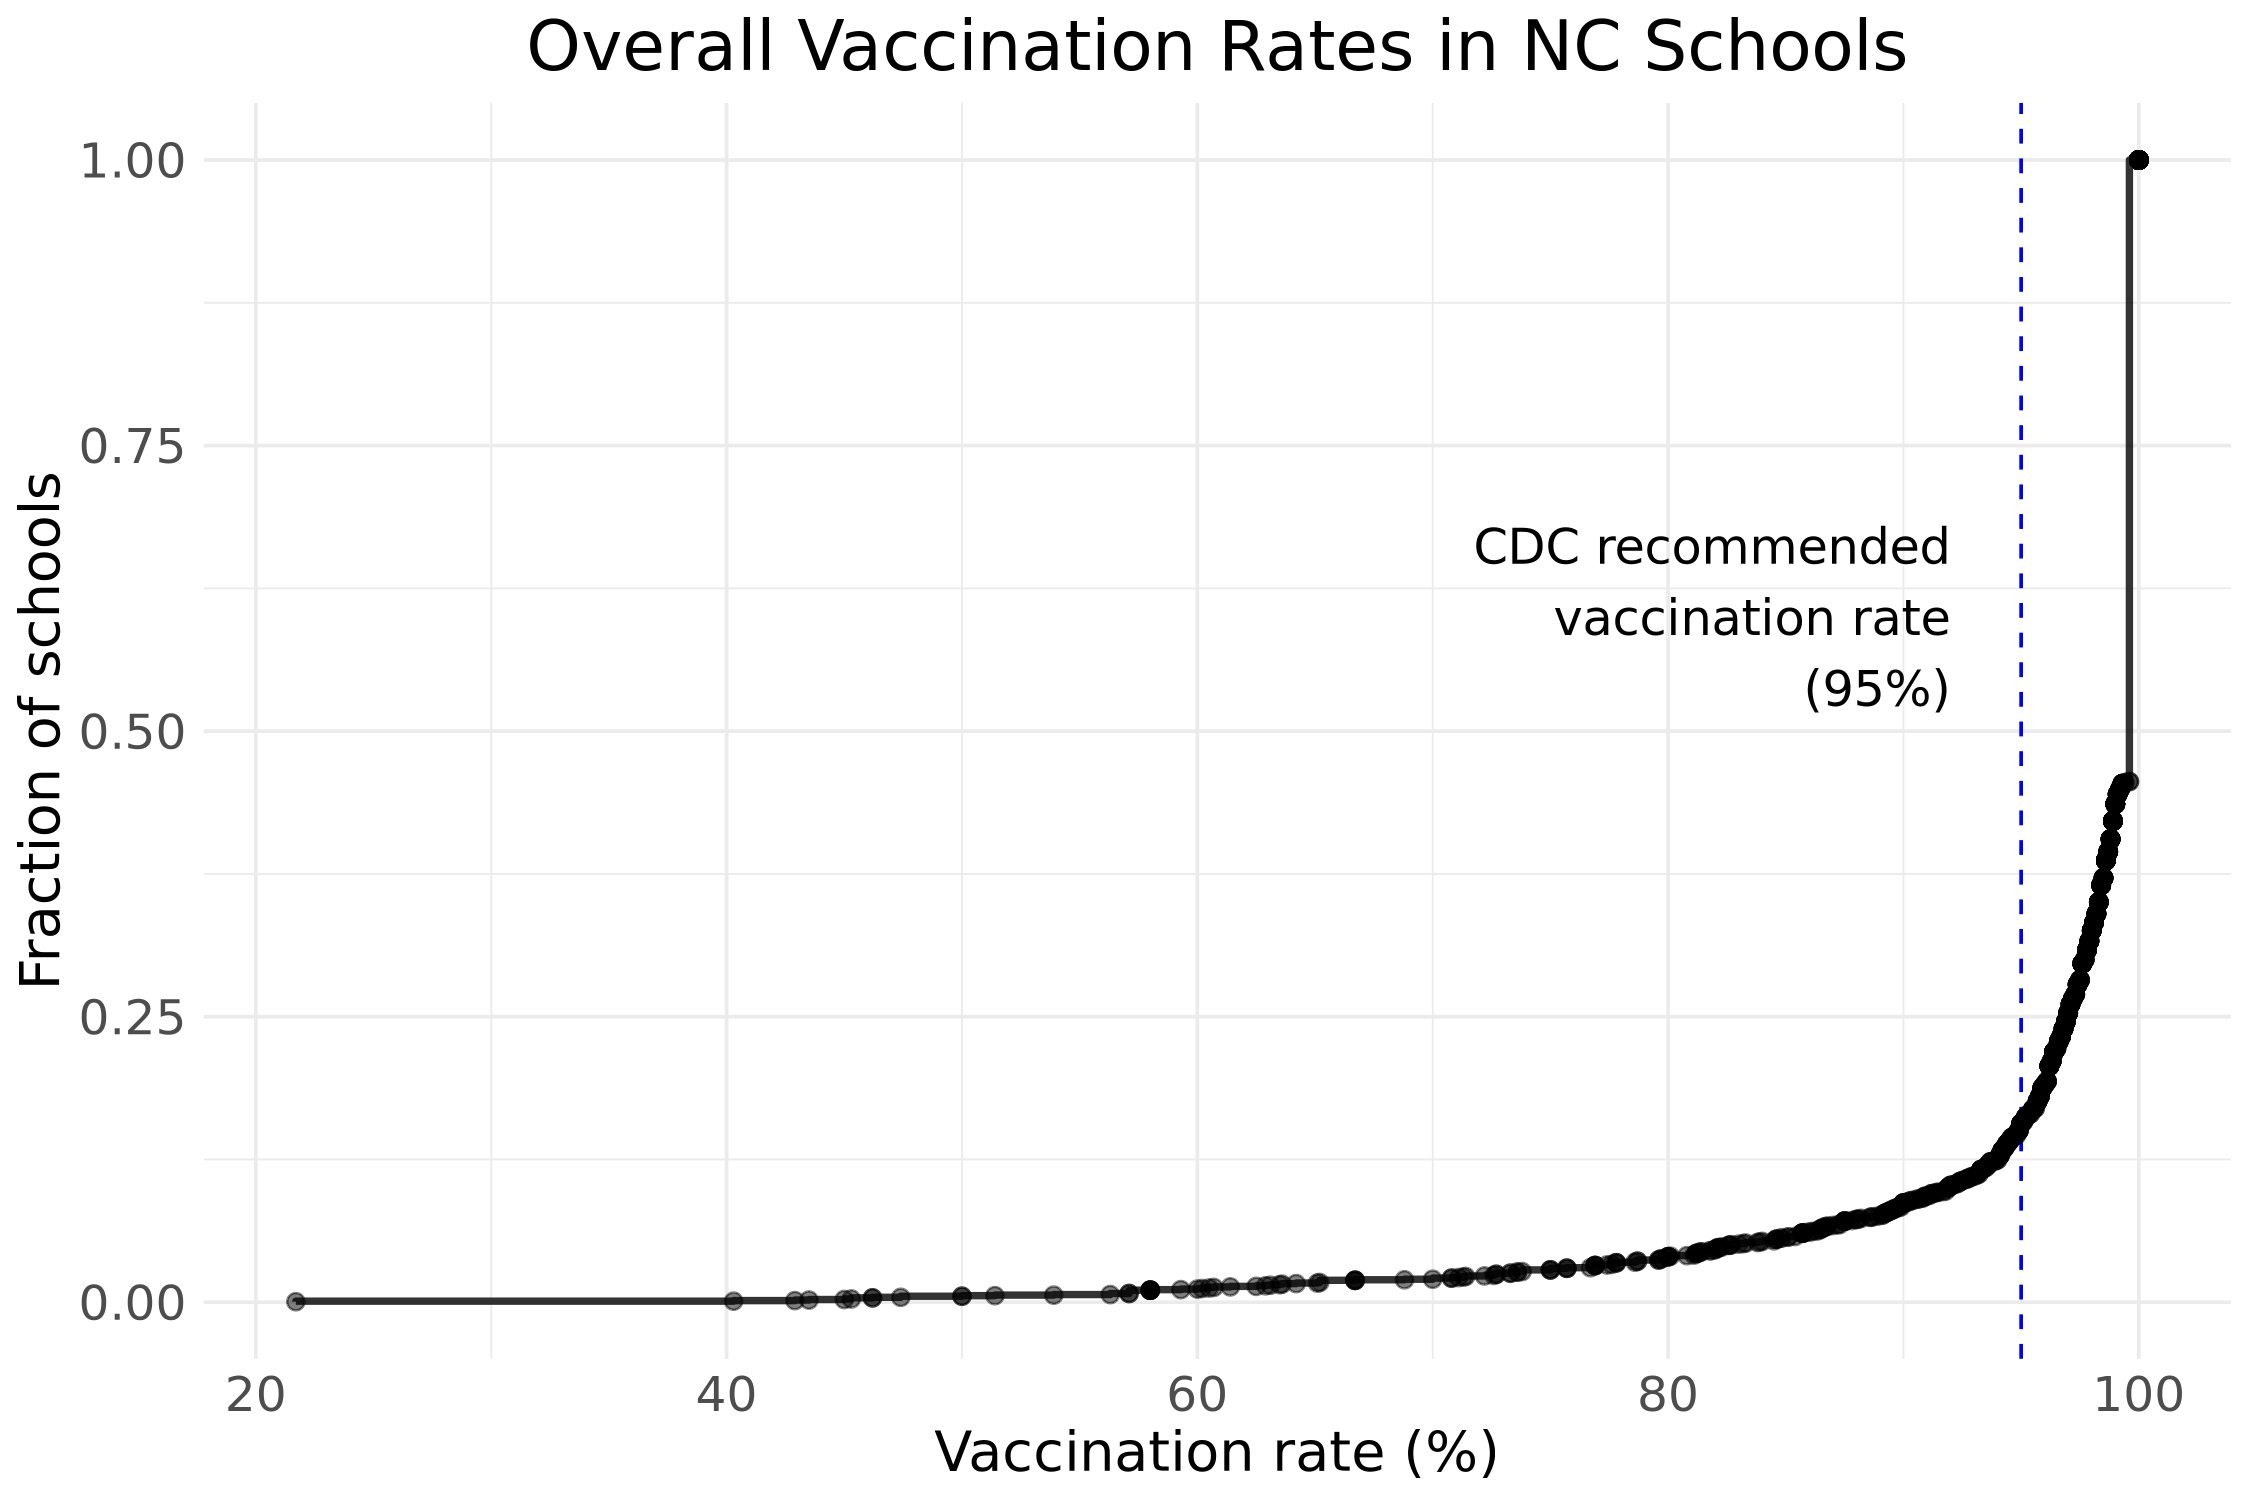

In [25]:
options(repr.plot.height = 6, repr.plot.width = 9)

# create cumulative dist values for y-axis
nc_ecdf <- measles |>
    filter(state == "North Carolina", overall >=0) |> # remove unreported values
    mutate(ecdf_y = cume_dist(overall))

# create ECDF plot
ggplot(nc_ecdf, aes(x = overall, y = ecdf_y)) +
geom_step(direction = 'vh', linewidth = 1, alpha = 0.8) +
geom_vline(xintercept = 95, linetype = "dashed", color = "blue") +
geom_point(aes(x = overall, y = ecdf_y), size = 2, alpha = 0.5, fill = "grey", color = "black") +
annotate("text", x = 92, y = 0.60, label = "CDC recommended\nvaccination rate\n(95%)", 
         hjust = 1, size = 5) +
labs(
    title = "Overall Vaccination Rates in NC Schools",
    x = "Vaccination rate (%)",
    y = "Fraction of schools") +
theme_minimal() +
theme(
    plot.title = element_text(hjust = 0.5, size = 20),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16))

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
# YES, THE MEDIAN VACCIANTION RATE FOR NC SCHOOLS IS LOCATED AT 0.5 ON THE Y-AXIS, WHICH CORRESPONDS TO VALUES HIGHER THAN 95%